# docker 실행하기

설치 확인
```
docker
```

이미지 다운로드
```
docker pull mysql:8
# 이미지_이름:태그
```


이미지 리스트
```
docker images

```

컨테이너 생성
```
docker run --name mysql-tutorial -e MYSQL_ROOT_PASSWORD=1234 -d -p 3306:3306 mysql:8

# --name mysql-tutorial
# 컨테이너 이름

# -e MYSQL_ROOT_PASSWORD=1234
# environment variables: HOME, HOSTNAME, PATH, TERM

# -d
# detached mode

# -p 3306:3306
# 포트 지정 (로컬_포트:컨테이너_포트)

# mysql:8
# 가져올 이미지

```

실행중인 컨테이너 리스트
```
docker ps

```

컨테이너 리스트
```
docker ps -a

```

컨테이너 진입 (ssh와 유사)
```
docker exec -it mysql-tutorial /bin/bash

```

컨테이너 중지
```
docker kill mysql-tutiorial

```

컨테이너 삭제
```
docker rm mysql-tutorial

```

호스트와 컨테이너 파일 공유 (volume mount)
```
docker run -it -p 8888:8888 -v 로컬_디렉토리:컨테이너_디렉토리

```

# docker image 만들기

### 먼저 폴더를 하나 만들고

```
python -m venv .venv

source .venv/bin/activate

pip install 'fastapi[all]'

pip freeze > requirements.txt

```

### main.py

GET /hello 로 요청하면 메세지를 전달하는 코드

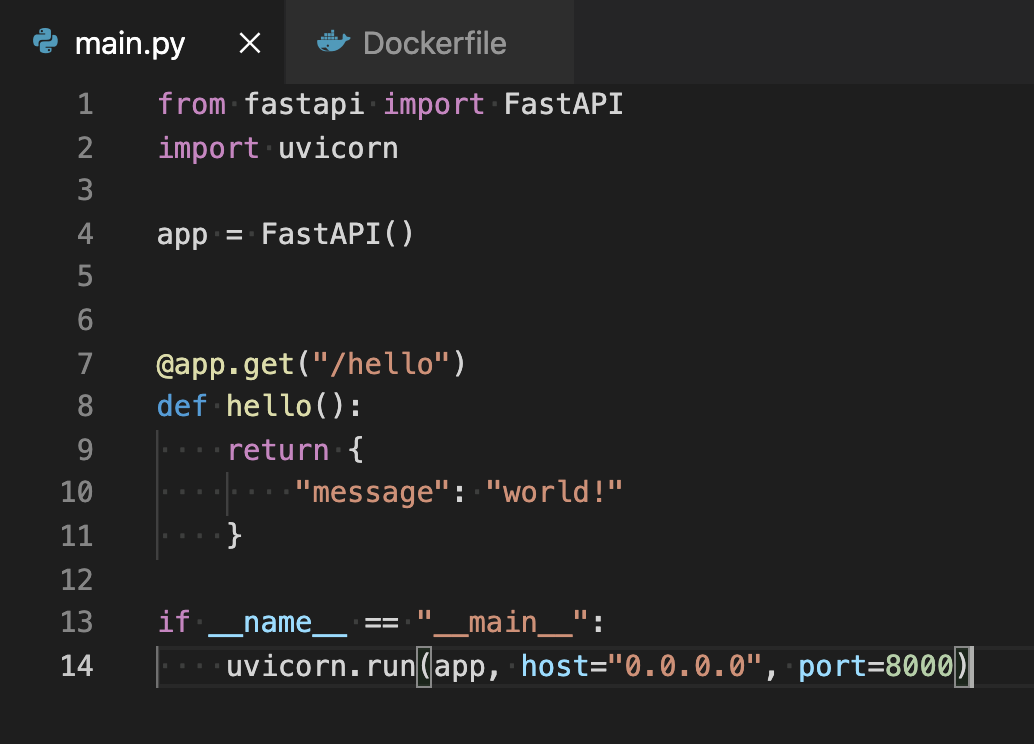

### Dockerfile

extension이 필요없음

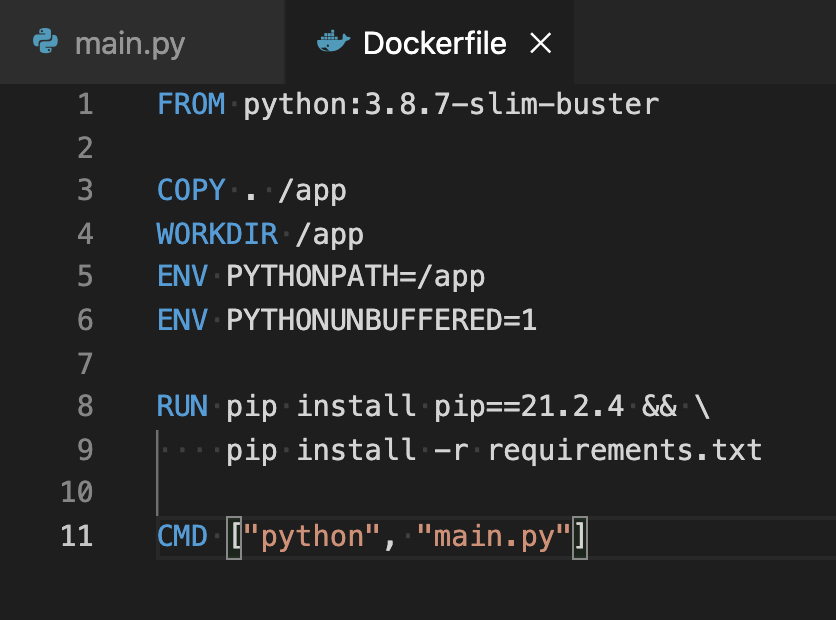

```
FROM python:3.8.7-slim-buster
# FROM 이미지_이름:태그
# 이미지 빌드에 사용할 베이스 이미지 지정
# 베이스 이미지는 미리 만들어진 이미지
# python:3.8.7-slim-buster는 Dockerhub에 존재하는 베이스 이미지

COPY . /app
# COPY 로컬_디렉토리 컨테이너_디렉토리
# 로컬 디렉토리의 모든 파일을 컨테이너 내 디렉토리로 옮김

WORKDIR /app
# WORKDIR 컨테이너_디렉토리
# 명령어를 실행할 경로 지정

ENV PYTHONPATH=/app
ENV PYTHONUNBUFFERED=1
# 컨테이너 내 환경변수 지정

RUN pip install pip==21.2.4 && \
    pip install -r requirements.txt
# RUN 실행할_리눅스_명령어

CMD ["python", "main.py"]
# CMD["실행할_명령어", "인자"]

```

### 빌드하기

```
docker build . -t my-fastapi-app
# docker build Dockerfile이_위치한_경로 -t 이미지_이름:태그
# 태그는 미지정시 latest로 채워짐

```

### 빌드한 이미지 확인

```
docker images

```

### 컨테이너 실행

```
docker run -p 8000:8000 my-fastapi-app

```

### 애플리케이션 작동 확인 (다른 터미널에서)

```
curl localhost:8000/hello

```